# Web Page Phishing

This dataset was taken from Kaggle: https://www.kaggle.com/datasets/danielfernandon/web-page-phishing-dataset?resource=download/

In this project, I'll be analyzing web page URL phishing data to determine which fields in a URL suggest that the URL may be phishing.

First I'll explore the data, analyze missing or 0 values, visuaize some features, then try a model for prediction.

1. [Data exploration](#data-exploration)
2. [Dealing with missing data](#dealing-with-missing-data)
3. [Data visualization](#data-visualization)
4. [Analysis Results](#analysis-results)
5. [Machine Learning Model](#machine-learning-model)

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Libraries

# Data exploration

In [45]:
filename = "web-page-phishing.csv"

In [46]:
import chardet

with open(filename, 'rb') as f:
    result = chardet.detect(f.read(10000))  
    print(result)

# First, let's check what encoding I need to read the data in with
# Reads the first 10,000 bytes to detect encoding

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [47]:
data = pd.read_csv(filename)
data.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

There are 20 variables, but 19 of them are just counts pertaining to an element of the hyperlink. The phishing column only has rows of 0s and 1s, which translates to: Normal Link, Phishing Link.

In [49]:
data['phishing'].value_counts()

phishing
0    63715
1    36362
Name: count, dtype: int64

In [50]:
data.describe()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
count,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000
mean,39.177683,2.224397,0.405188,0.137724,1.135386,0.024391,0.215834,0.022143,0.143330,0.002608,0.004876,0.003617,0.002378,0.002468,0.004097,0.000450,0.001899,0.109286,0.361532,0.363340
std,47.971847,1.255046,1.285465,0.723995,1.828526,0.167789,0.959802,0.268393,0.913656,0.082207,0.144569,0.078500,0.079558,0.104382,0.284046,0.058028,0.097412,1.695327,0.775492,0.480964
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4165.000000,24.000000,43.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,18.000000,5.000000,11.000000,19.000000,60.000000,13.000000,10.000000,174.000000,17.000000,1.000000


Descriptive statistics show that most link features have minimum and 75th percentile values of zero, but the maximum values vary significantly. The large difference between the 75th percentile and the maximum in 'url_length', 'n_dots', and "n_redirection" columns suggests that there are outliers.

# Dealing with missing data

In [51]:
data[data.columns[data.isnull().sum() > 0].tolist()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Empty DataFrame


No columns have missing values, we can move on.

# Data visualization

I'll look into the data correlation first, then visualize the data to see the impact of certain elements.

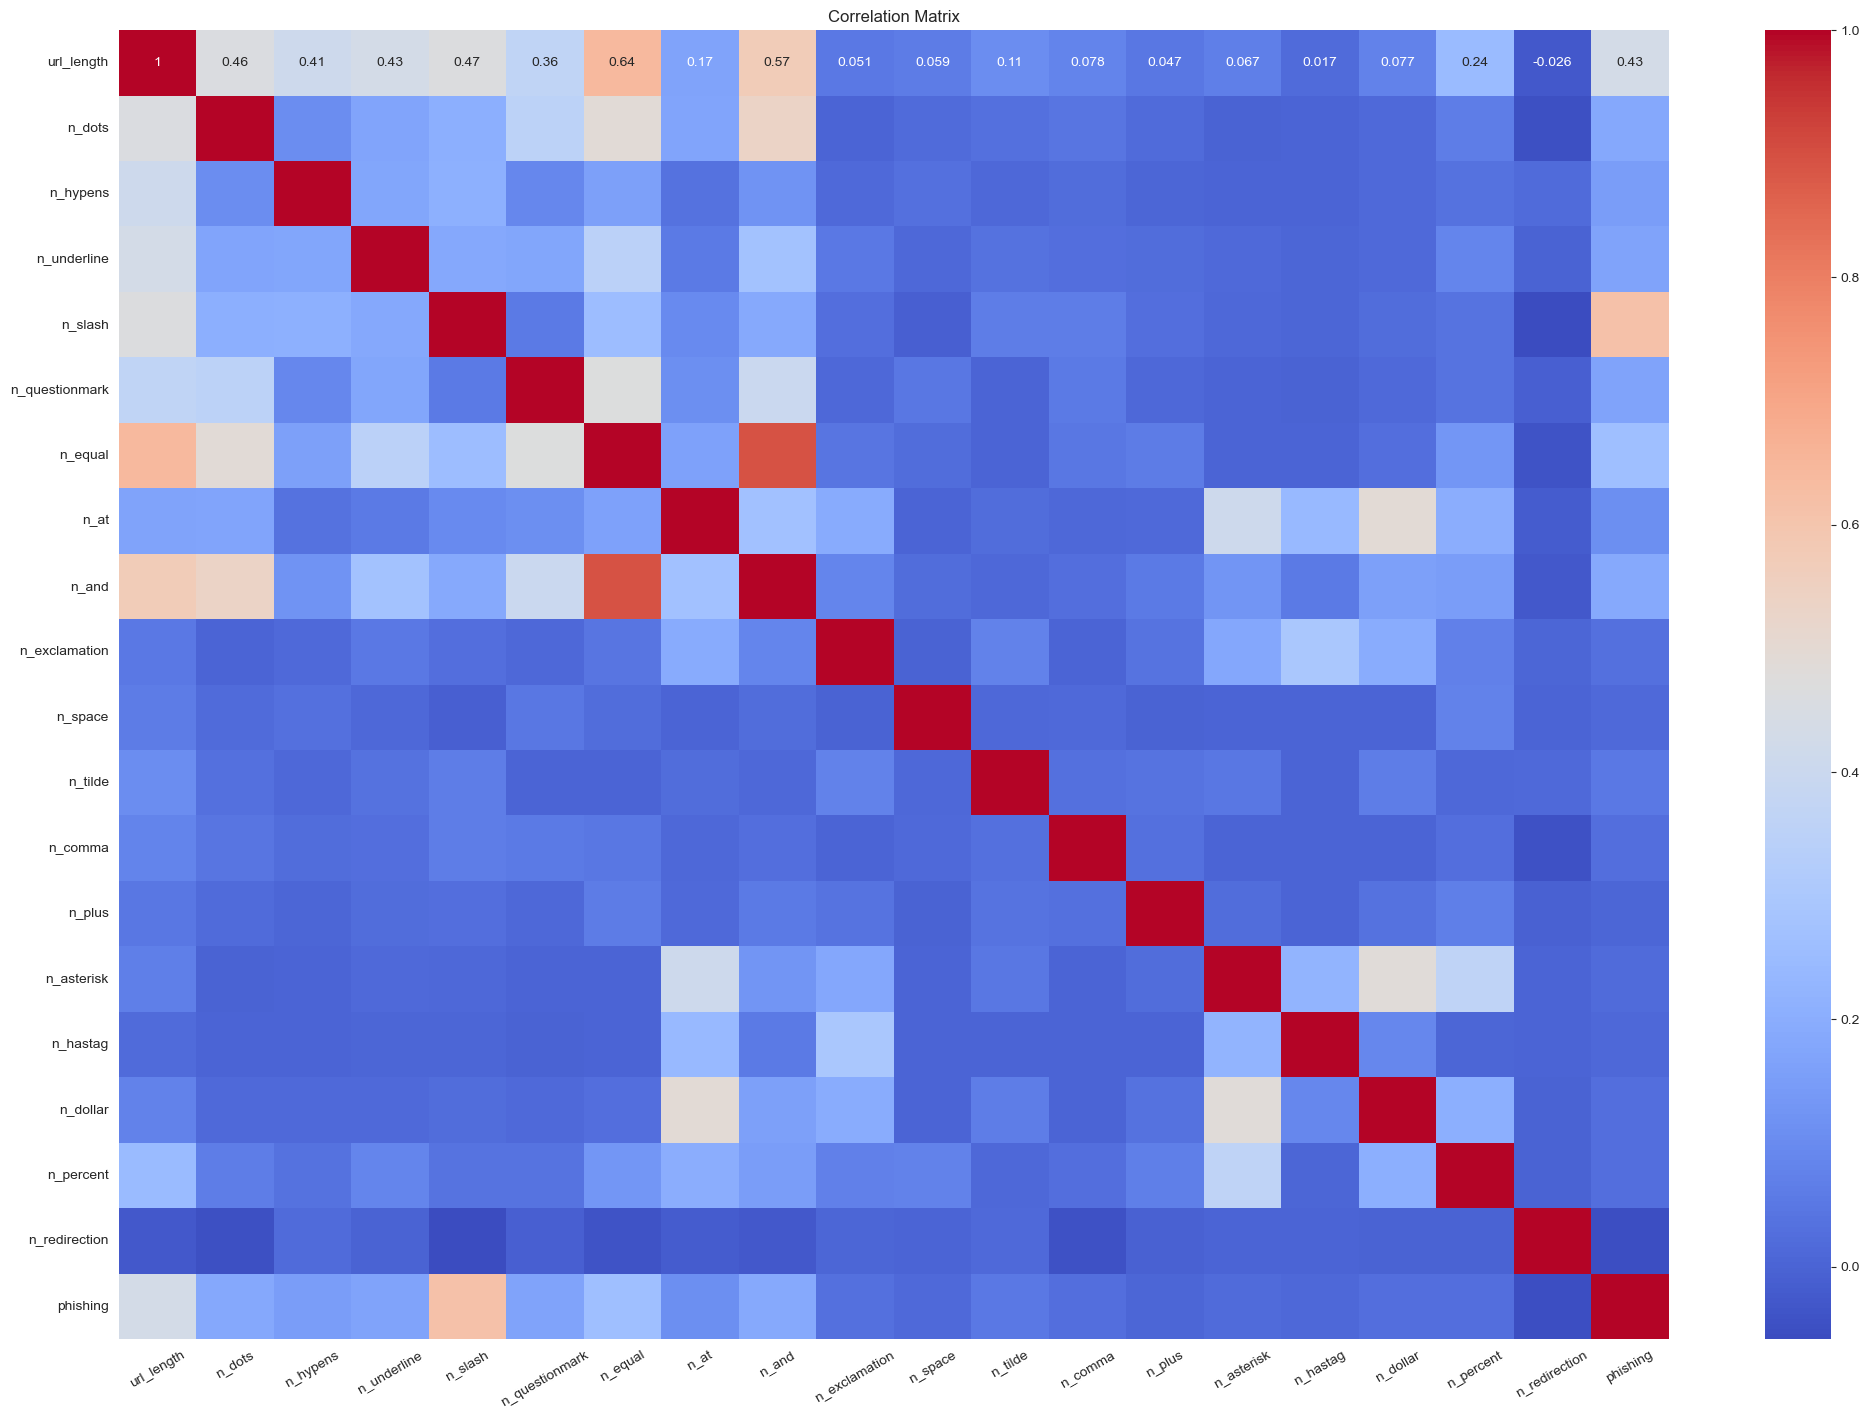

In [66]:
corr_matrix = data.corr()
plt.figure(figsize=(25,17))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmax=1)
#sns.heatmap(corr_matrix, vmax=1)
plt.xticks(rotation=30)
plt.title('Correlation Matrix')
plt.show()

Only one variable, n_slash, seems to have any meaningful correlation to whether a link is phishing or not. Below is code to find the most useful correlation coefficients without the visualization.

In [53]:
corr_phishing = corr_matrix['phishing'].sort_values(ascending=False)

In [54]:
print("Strongest correlation(s) with 'phishing':")
print(corr_phishing[1:].head(1))
print("Weakest correlation(s) with 'phishing':")
print(corr_phishing[1:].tail(1))

Strongest correlation(s) with 'phishing':
n_slash    0.611472
Name: phishing, dtype: float64
Weakest correlation(s) with 'phishing':
n_redirection   -0.050822
Name: phishing, dtype: float64


Let's visualize each element of the hyperlinks against Phishing so we can see how the data is distributed.

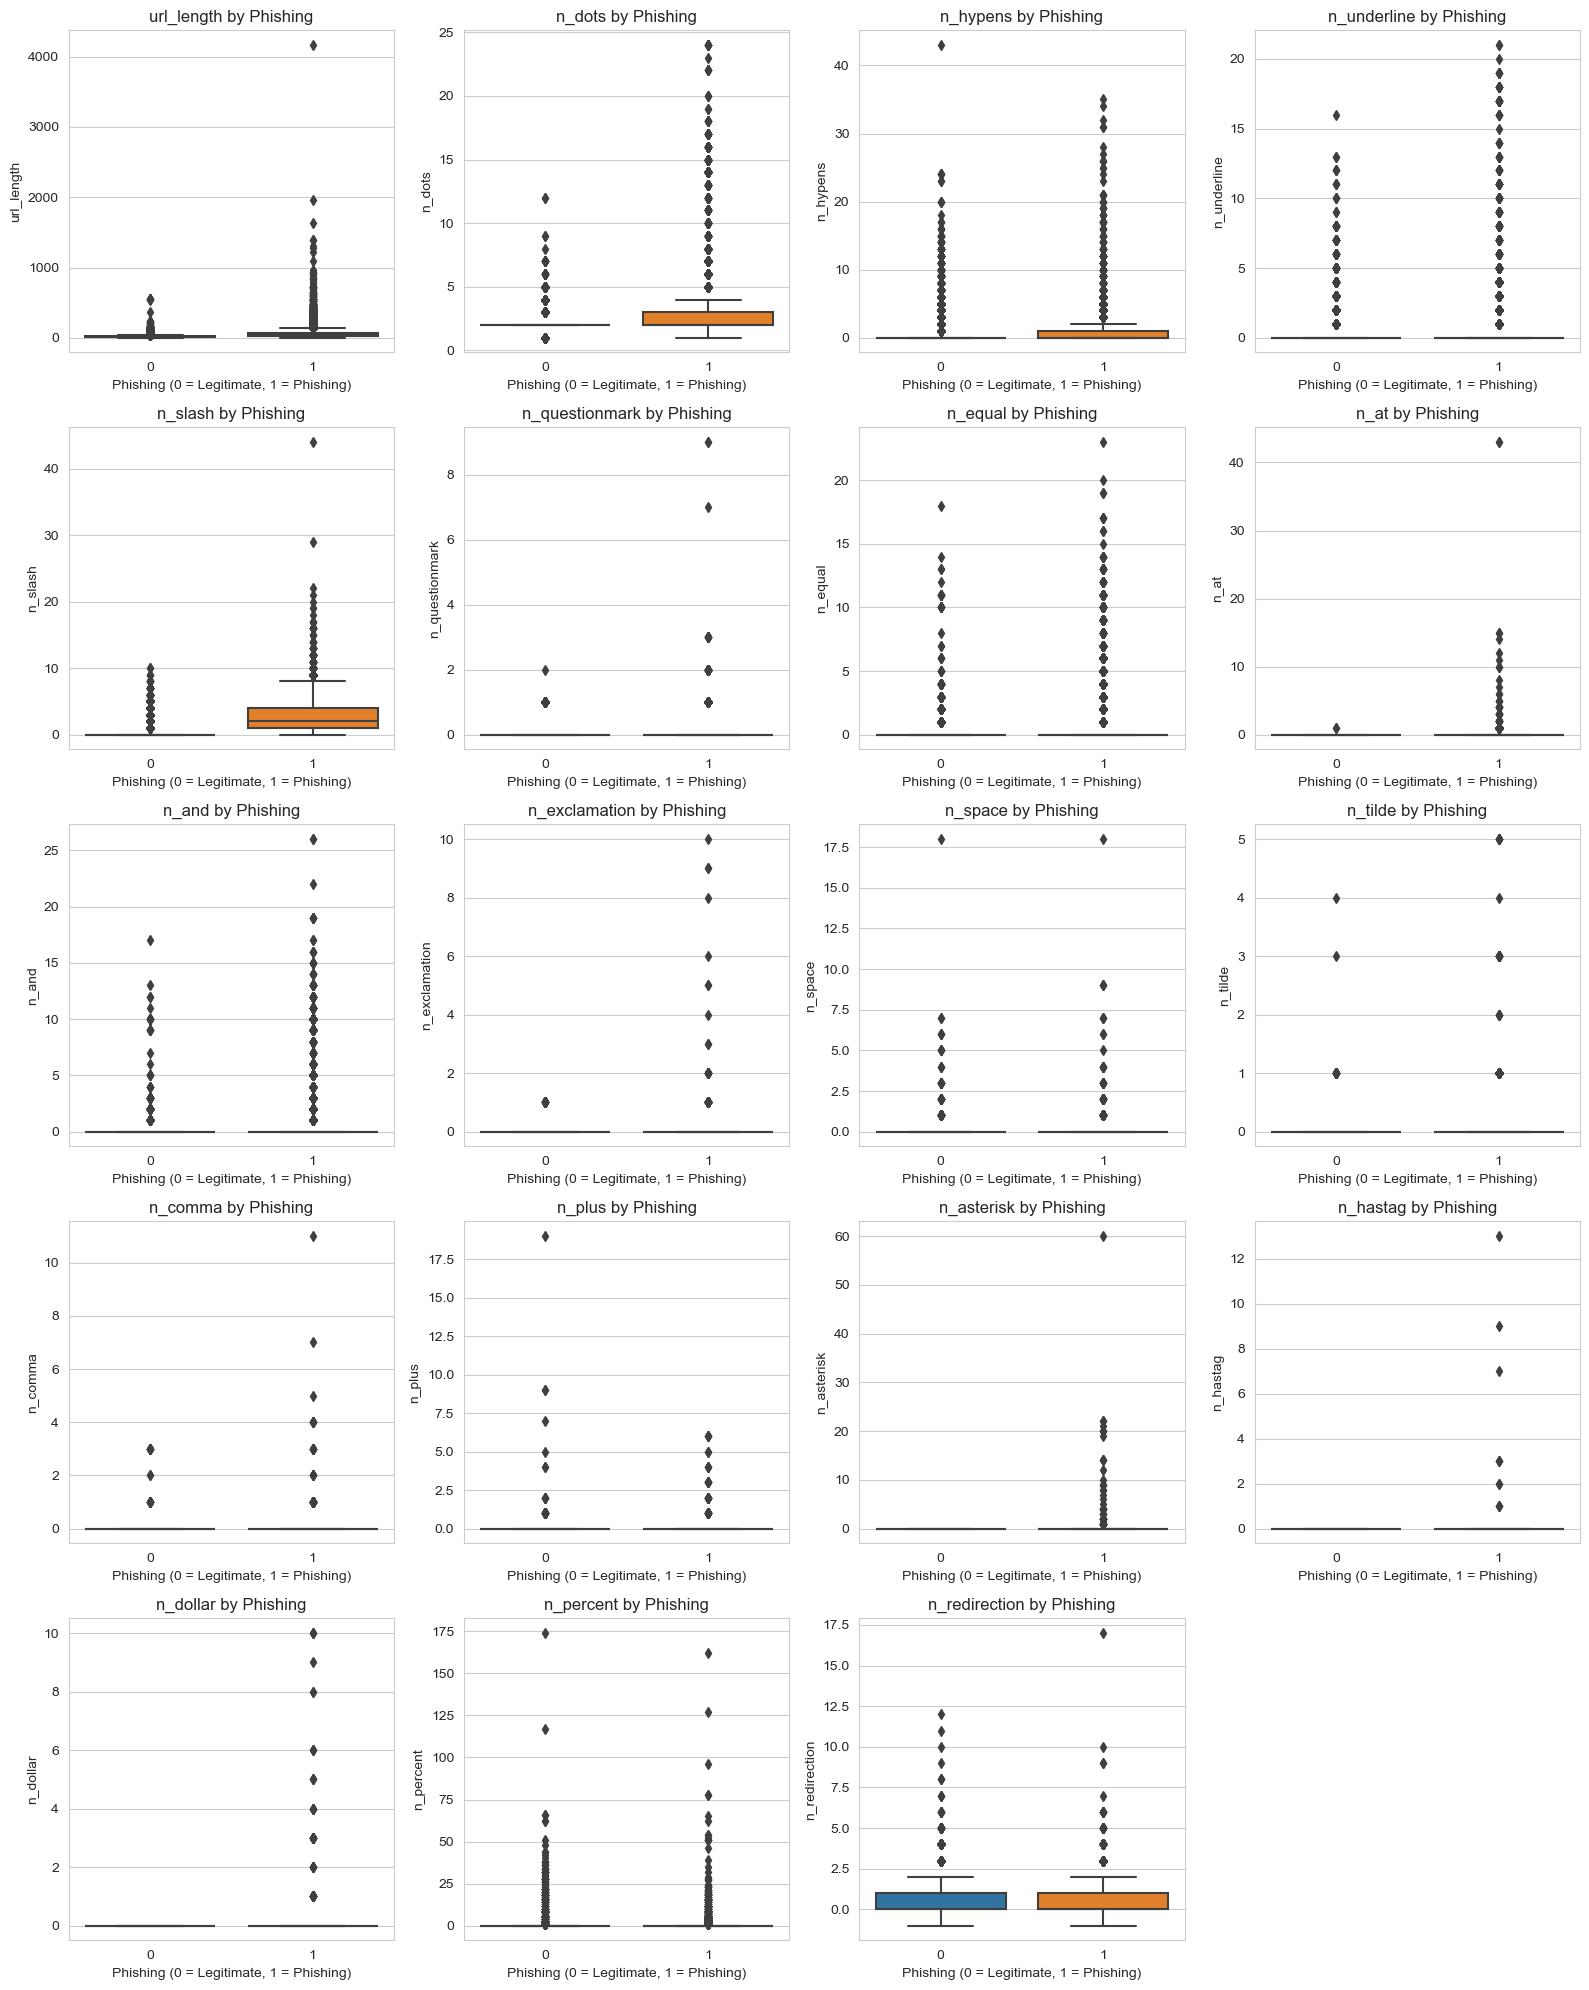

In [55]:
columns = data.columns.drop('phishing')

num_columns = len(columns)
n_cols = 4
n_rows = (num_columns // n_cols) + (num_columns % n_cols > 0)

plt.figure(figsize=(16, 4 * n_rows))

for i, column in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.boxplot(x='phishing', y=column, data=data)
    
    plt.title(f'{column} by Phishing')
    plt.xlabel('Phishing (0 = Legitimate, 1 = Phishing)')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

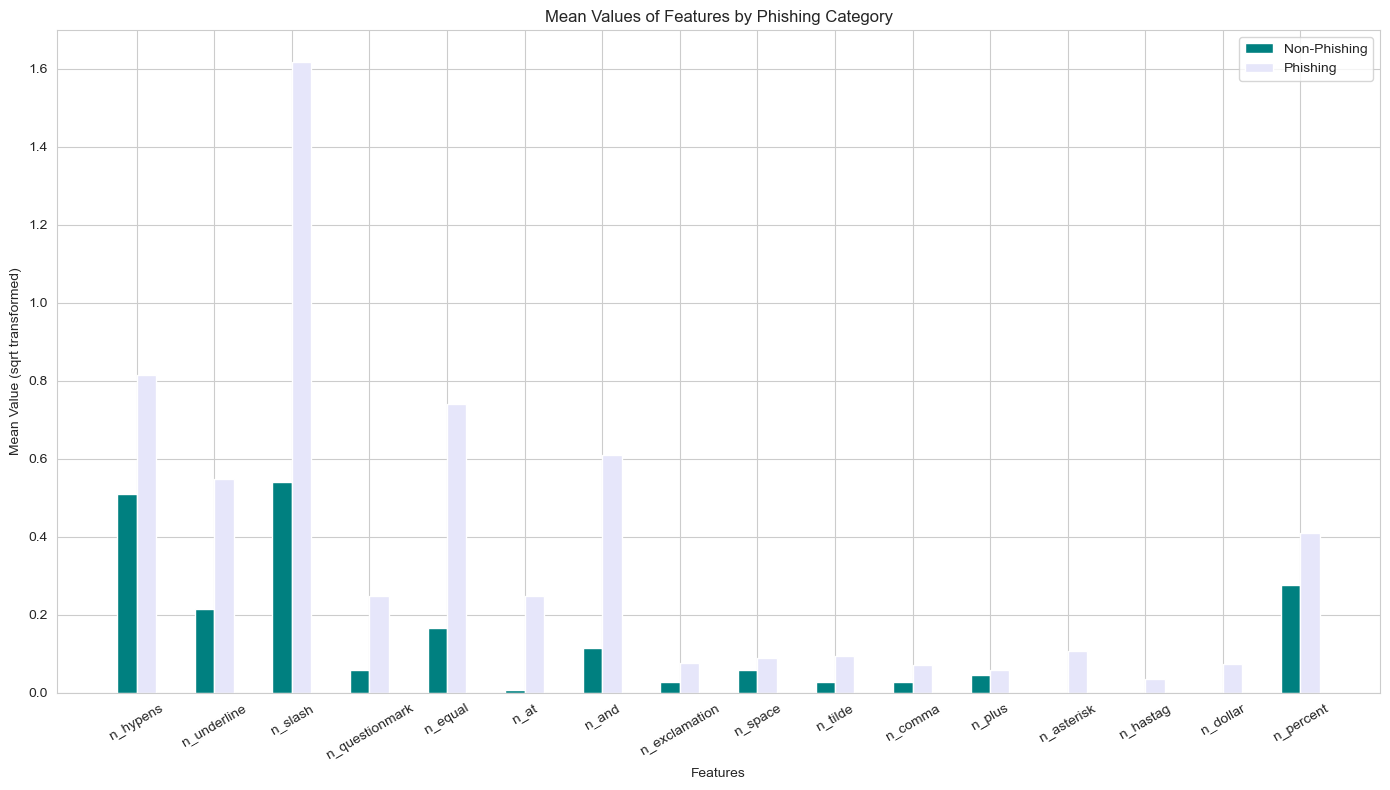

In [56]:
url_elements = data.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]].groupby('phishing').mean()

# Apply square root transformation to handle skewness and outliers
stat_data = np.sqrt(url_elements)

n_features = len(stat_data.columns)
index = np.arange(n_features)
bar_width = 0.25

plt.figure(figsize=(14, 8))

plt.bar(index, stat_data.iloc[0], bar_width, label='Non-Phishing', color = 'teal')
plt.bar(index + bar_width, stat_data.iloc[1], bar_width, label='Phishing', color = 'lavender')

plt.xlabel('Features')
plt.ylabel('Mean Value (sqrt transformed)')
plt.title('Mean Values of Features by Phishing Category')
plt.xticks(index + bar_width / 2, stat_data.columns, rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

Phishing URLs tend to have more characters than legitimate links. Specifically, they tend to have more slashes, hyphens, and underscores on average. Adding symbols and query parameters to links may make a phishing URL look more complex, in order to seem like a legitimate website. These features may offer strong clues for phishing detection.

I'll look into three different columns and test their correlation with the phishing column:
n_slash, n_redirection, and url_length.

### Is the URL length is a strong indicator of whether or not the URL is phishing?

In [57]:
url_phishing_corr = data['url_length'].corr(data['phishing'])
url_phishing_corr

0.4301253848208332

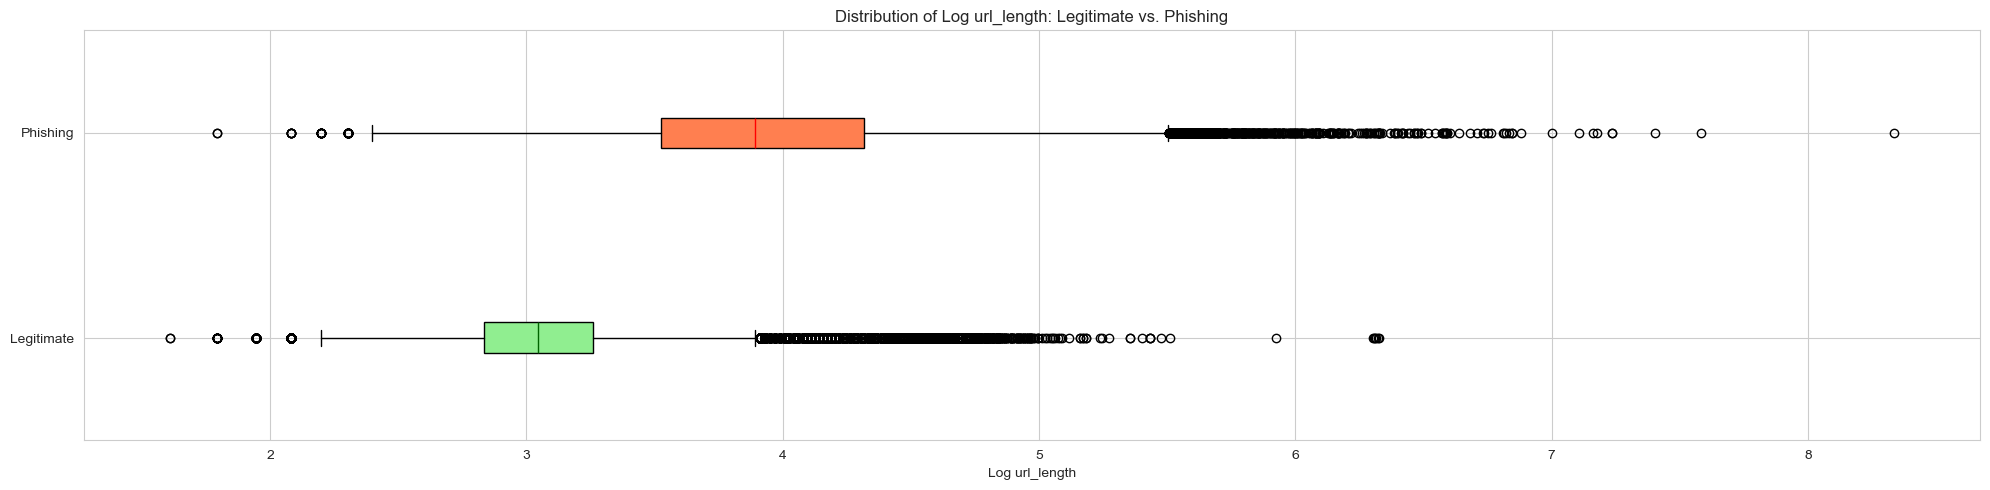

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

ax.boxplot(np.log(data.loc[data['phishing'] == 0, 'url_length'] + 1),
           vert=False, positions=[1], patch_artist=True,
           boxprops=dict(facecolor='lightgreen'),
           medianprops=dict(color='darkgreen'))

ax.boxplot(np.log(data.loc[data['phishing'] == 1, 'url_length'] + 1),
           vert=False, positions=[2], patch_artist=True,
           boxprops=dict(facecolor='coral'),
           medianprops=dict(color='red'))

ax.set_title('Distribution of Log url_length: Legitimate vs. Phishing')
ax.set_xlabel('Log url_length')
ax.set_yticks([1, 2], ['Legitimate', 'Phishing'])

plt.tight_layout()
plt.show()

The two metrics I will use to assess the relationship between these two variables are: the correlation coefficient and a visualization.

The correlation of 0.43 suggests a moderate positive relationship between url length and phishing. It is not strong, but it still indicates a meaningful connection that longer URLs are somewhat associated with phishing.

In the boxplot visualization, we can see that phishing URLs tend to be longer, confirming that URL length can provide useful insight. It may be helpful to recalculate the correlation after removing the outlier.

URL length can be considered a moderate indicator of phishing based on these metrics.

This is not a definitive indicator however, some phishing links may be short and some legitimate links may be long.

### Is the number of redirections a strong indicator of whether or not the URL is phishing?

In [59]:
redirect_phishing_corr = data['n_redirection'].corr(data['phishing'])
redirect_phishing_corr

-0.05082186723442443

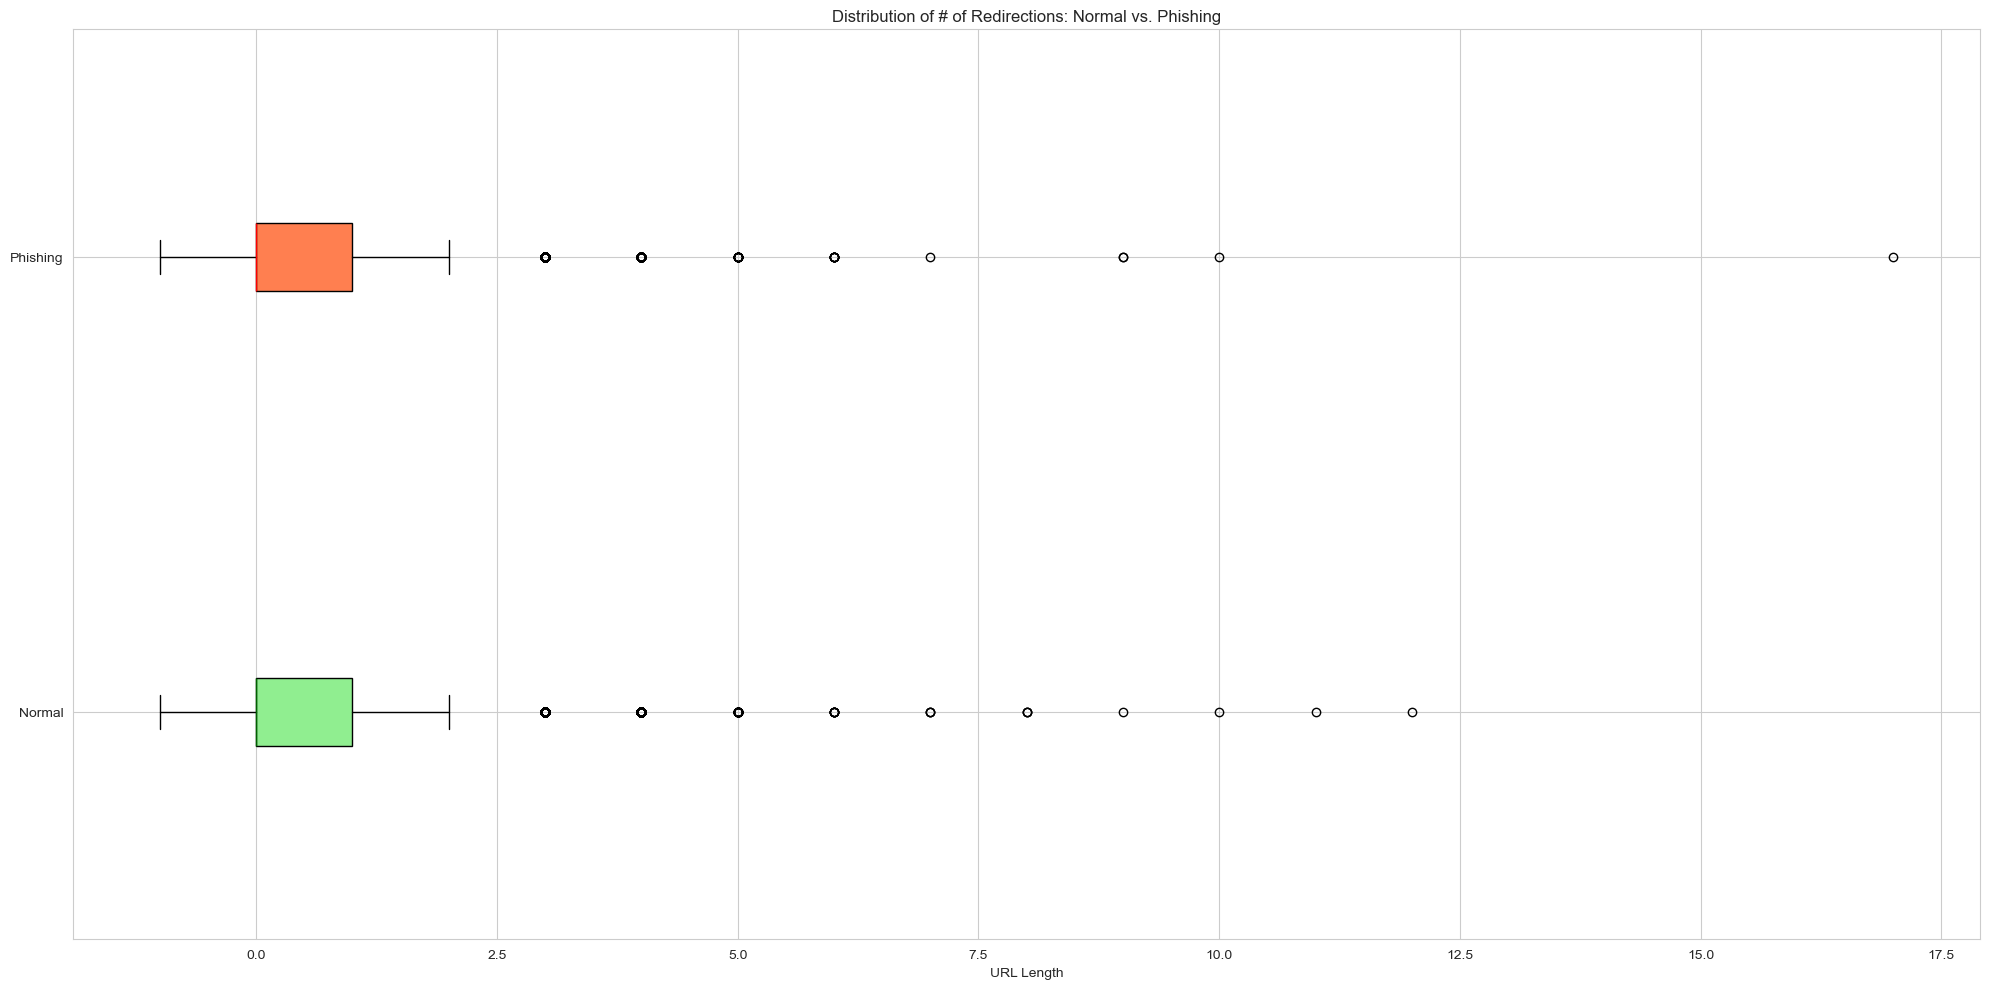

In [60]:
plt.figure(figsize=(20,10))
plt.boxplot((data.loc[data['phishing'] == 0,'n_redirection']), 
            vert=False, positions=[1], patch_artist=True,
            boxprops=dict(facecolor='lightgreen'), 
            medianprops=dict(color='darkgreen'))  
plt.boxplot((data.loc[data['phishing'] == 1,'n_redirection']), 
            vert=False, positions=[2], patch_artist=True,
            boxprops=dict(facecolor='coral'), 
            medianprops=dict(color='red'))  
plt.title('Distribution of # of Redirections: Normal vs. Phishing')
plt.xlabel('URL Length')
plt.yticks([1, 2], ['Normal', 'Phishing'])
plt.tight_layout()
plt.show()

# Here, even adding +1 to our np.log() function would give an error. This is because many of the values 
# in the n_redirection column have a value of -1. I am still unsure how to translate that value to words, 
# perhaps an error such as a broken link.

Based on the correlation coefficient of -.05, this indicates almost no linear relationship between the number of redirections and whether the URL is phishing or legitimate. The boxplots are very similar as well, which further reinforces this conclusion. 

The number of redirections is NOT a reliable indicator of distingushing phishing URLS, and the visualizations show us that attackers and legitimate sights may use a similar number of redirections.

### Is the number of slashes a strong indicator of whether or not the url is phishing?

In [61]:
slash_phishing_corr = data['n_slash'].corr(data['phishing'])
slash_phishing_corr

0.6114722328591202

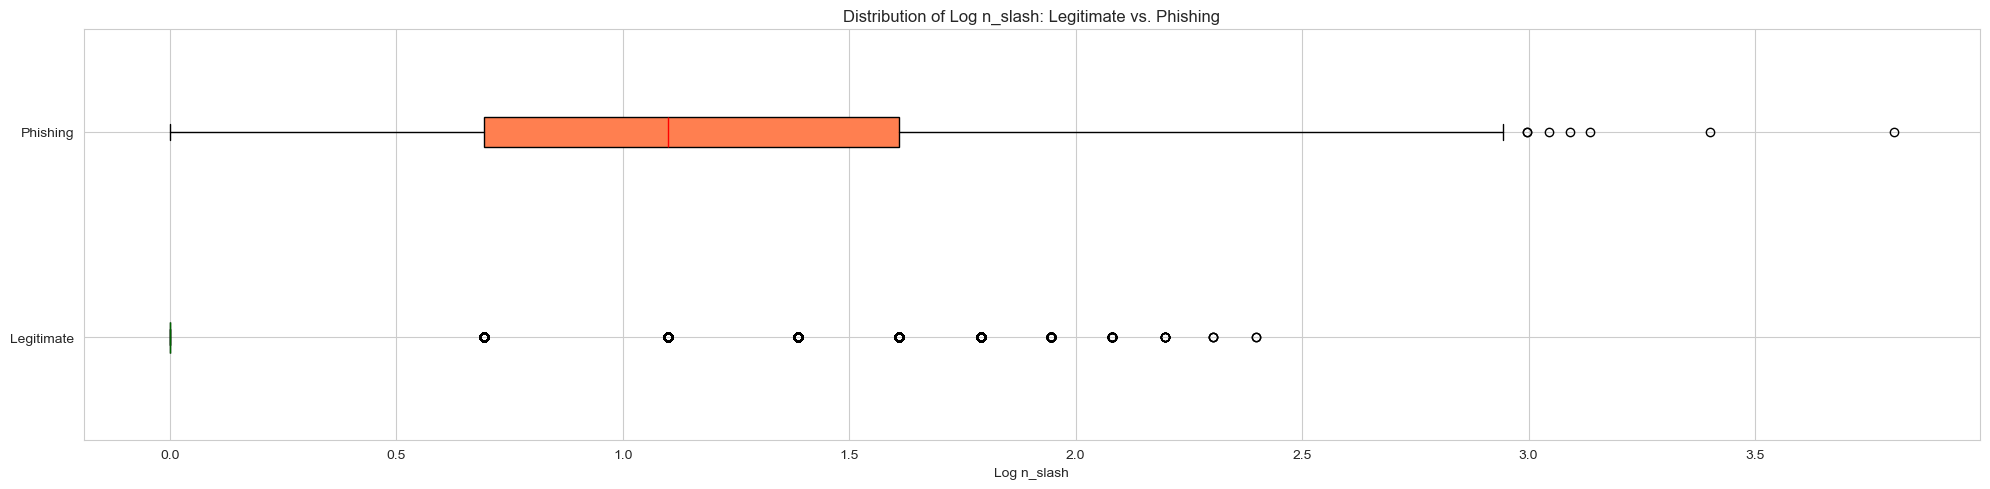

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

ax.boxplot(np.log(data.loc[data['phishing'] == 0, 'n_slash'] + 1),
           vert=False, positions=[1], patch_artist=True,
           boxprops=dict(facecolor='lightgreen'),
           medianprops=dict(color='darkgreen'))

ax.boxplot(np.log(data.loc[data['phishing'] == 1, 'n_slash'] + 1),
           vert=False, positions=[2], patch_artist=True,
           boxprops=dict(facecolor='coral'),
           medianprops=dict(color='red'))

ax.set_title('Distribution of Log n_slash: Legitimate vs. Phishing')
ax.set_xlabel('Log n_slash')
ax.set_yticks([1, 2], ['Legitimate', 'Phishing'])

plt.tight_layout()
plt.show()

The correlation of 0.61 suggests a moderate strong positive relationship between the number of slashes and phishing. This suggests that phishing sites tend to have more slashes in their URLs, but this is still not a perfect indicator. n_slash is an important indicator of phishing, but not the sole determinant.

In the boxplot visualization, we can see that that the phishing boxplot has a widespread distribution, with a much higher IQR than legitimate sites. The second boxplot is centered around 0, meaning most legitimate sites have very few or no slashes.

The number of slashes can be a useful feature to indicate fishing, but should be combined with other indicators to improve detection accuracy.

# Analysis Results

Based on the analysis, several URL features were examined to determine their effectiveness in distinguishing phishing websites from legitimate ones. Among the various features studied, only one variable, n_slash (number of slashes), showed a strong enough correlation to be considered a meaningful indicator of phishing. The analysis focused on three main variables: URL length, number of redirections, and number of slashes.

The number of slashes (n_slash) is the most promising feature for identifying phishing URLs, followed by URL length as a moderate indicator. The number of redirections does not appear to offer any meaningful insight. While these features are helpful, they should be used in combination with other indicators to improve phishing detection accuracy. Ultimately, no single feature is sufficient to definitively classify a URL as phishing, and a multi-feature approach is necessary for more robust detection.

# Machine Learning Model

## Random Forest

The Random Forest Classifier is usually good in cases with many features. The model was trained to distinguish between legitimate and phishing using the target features: number of slashes, URL length, number of hyphens, number of underscores, and number of redirections.  The performance of the model was evaluated using accuracy scores, confusion matrix, and classification report.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


features = ['n_slash', 'url_length', 'n_hypens', 'n_underline', 'n_redirection']  # target features for analysis
X = data[features].copy()  #  trying to avoid SettingWithCopyWarning

# Apply square root transformation where necessary using .loc
X.loc[:, 'n_slash'] = np.sqrt(X['n_slash'] + 1)  # Adding 1 to avoid issues with sqrt(0)
X.loc[:, 'url_length'] = np.sqrt(X['url_length'] + 1)
X.loc[:, 'n_hypens'] = np.sqrt(X['n_hypens'] + 1)
X.loc[:, 'n_underline'] = np.sqrt(X['n_underline'] + 1)
X.loc[:, 'n_redirection'] = np.sqrt(X['n_redirection'] + 1)

y = data['phishing']
X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(
    n_estimators=80,
    max_depth=18,
    max_features='sqrt',
    min_samples_split=12,
    criterion='gini'
)

model.fit(X_train, y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

print(f"Train Accuracy Score: {accuracy_score(y_train, predictions_train)}")
print(f"Test Accuracy Score: {accuracy_score(y_test, predictions_test)}")

print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_test))
print("Classification Report:\n", classification_report(y_test, predictions_test))


Train Accuracy Score: 0.8931314872409788
Test Accuracy Score: 0.8798461231015188
Confusion Matrix:
 [[11588  1110]
 [ 1295  6023]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     12698
           1       0.84      0.82      0.83      7318

    accuracy                           0.88     20016
   macro avg       0.87      0.87      0.87     20016
weighted avg       0.88      0.88      0.88     20016



The model shows a strong ability to generalize, indicated by the relatively high accuracy in the training and test sets, the model is not overfitting.

The confusion matrix shows that the model identified a majority of legitimate URLs while misclassifying a portion of phishing URLs. 
There were 1,129 false positives, indicating that some legitimate URLs were incorrectly classified, this needs further analysis.

There is room for improvement in identifying phishing URLs, achieving higher accuyracy and a better balance between precision and recall. Perhaps with different/more features or different hyperparameters I can enhance accuracy.

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [65]:
model2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=2,
    criterion='gini'
)

model2.fit(X_train, y_train)

predictions_train2 = model2.predict(X_train)
predictions_test2 = model2.predict(X_test)

print("Second Model Results:")
print(f"Train Accuracy Score: {accuracy_score(y_train, predictions_train2)}")
print(f"Test Accuracy Score: {accuracy_score(y_test, predictions_test2)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_test2))
print("Classification Report:\n", classification_report(y_test, predictions_test2))

Second Model Results:
Train Accuracy Score: 0.8929566205768101
Test Accuracy Score: 0.8804456434852118
Confusion Matrix:
 [[11572  1126]
 [ 1267  6051]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     12698
           1       0.84      0.83      0.83      7318

    accuracy                           0.88     20016
   macro avg       0.87      0.87      0.87     20016
weighted avg       0.88      0.88      0.88     20016



Both models perform similarly, with only slight variations in train/test accuracy. Model 2 has only a slightly better test accuracy. Both show strong precision and recall values for legitimate URLs.